In [23]:
# %matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Preliminaries

In [24]:
# import modules
import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

# profile = pandas_profiling.ProfileReport(df)
# profile.to_file(outputfile="Titanic data profiling.html")


In [25]:
# Create dataframe
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [26]:
# Create a groupby variable that groups preTestScores by regiment
groupby_regiment = df['preTestScore'].groupby(df['regiment'])
groupby_regiment

In [27]:
groupby_regiment.groups

{'Dragoons': Int64Index([4, 5, 6, 7], dtype='int64'),
 'Nighthawks': Int64Index([0, 1, 2, 3], dtype='int64'),
 'Scouts': Int64Index([8, 9, 10, 11], dtype='int64')}

In [28]:
groupby_regiment_2 = df.groupby('regiment')
print(groupby_regiment_2)
print(groupby_regiment_2.groups)
groupby_regiment_2.get_group('Dragoons')


{'Dragoons': Int64Index([4, 5, 6, 7], dtype='int64'), 'Nighthawks': Int64Index([0, 1, 2, 3], dtype='int64'), 'Scouts': Int64Index([8, 9, 10, 11], dtype='int64')}


,regiment,company,name,preTestScore,postTestScore
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57


"This grouped variable is now a GroupBy object. It has not actually computed anything yet except for some intermediate data about the group key `df['key1']`. The idea is that this object has all of the information needed to then apply some operation to each of the groups." - Python for Data Analysis

## View a grouping

Use list() to show what a grouping looks like

In [29]:
list(df['preTestScore'].groupby(df['regiment']))

[('Dragoons', 4     3
  5     4
  6    24
  7    31
  Name: preTestScore, dtype: int64), ('Nighthawks', 0     4
  1    24
  2    31
  3     2
  Name: preTestScore, dtype: int64), ('Scouts', 8     2
  9     3
  10    2
  11    3
  Name: preTestScore, dtype: int64)]

In [30]:
list(df.groupby('regiment')['preTestScore'])

[('Dragoons', 4     3
  5     4
  6    24
  7    31
  Name: preTestScore, dtype: int64), ('Nighthawks', 0     4
  1    24
  2    31
  3     2
  Name: preTestScore, dtype: int64), ('Scouts', 8     2
  9     3
  10    2
  11    3
  Name: preTestScore, dtype: int64)]

## Descriptive statistics by group

In [31]:
df['preTestScore'].groupby(df['regiment']).describe()

,count,mean,std,min,25%,50%,75%,max
regiment,,,,,,,,
Dragoons,4.0,15.50,14.153916,3.0,3.75,14.0,25.75,31.0
Nighthawks,4.0,15.25,14.453950,2.0,3.50,14.0,25.75,31.0
Scouts,4.0,2.50,0.577350,2.0,2.00,2.5,3.00,3.0


### Mean of each regiment's preTestScore

In [32]:
groupby_regiment.mean()

regiment
Dragoons      15.50
Nighthawks    15.25
Scouts         2.50
Name: preTestScore, dtype: float64

### Mean preTestScores grouped by regiment and company

In [33]:
list(df['preTestScore'].groupby([df['regiment'], df['company']]))

[(('Dragoons', '1st'), 4    3
  5    4
  Name: preTestScore, dtype: int64), (('Dragoons', '2nd'), 6    24
  7    31
  Name: preTestScore, dtype: int64), (('Nighthawks', '1st'), 0     4
  1    24
  Name: preTestScore, dtype: int64), (('Nighthawks', '2nd'), 2    31
  3     2
  Name: preTestScore, dtype: int64), (('Scouts', '1st'), 8    2
  9    3
  Name: preTestScore, dtype: int64), (('Scouts', '2nd'), 10    2
  11    3
  Name: preTestScore, dtype: int64)]

In [34]:
df['preTestScore'].groupby([df['regiment'], df['company']]).first()

regiment    company
Dragoons    1st         3
            2nd        24
Nighthawks  1st         4
            2nd        31
Scouts      1st         2
            2nd         2
Name: preTestScore, dtype: int64

In [35]:
df['preTestScore'].groupby([df['regiment'], df['company']]).mean()

regiment    company
Dragoons    1st         3.5
            2nd        27.5
Nighthawks  1st        14.0
            2nd        16.5
Scouts      1st         2.5
            2nd         2.5
Name: preTestScore, dtype: float64

### Mean preTestScores grouped by regiment and company without heirarchical indexing

In [36]:
df['preTestScore'].groupby([df['regiment'], df['company']]).mean().unstack()

company,1st,2nd
regiment,,
Dragoons,3.5,27.5
Nighthawks,14.0,16.5
Scouts,2.5,2.5


### Group the entire dataframe by regiment and company

In [37]:
df.groupby(['regiment', 'company']).mean()

preTestScore  postTestScore
regiment   company                             
Dragoons   1st               3.5           47.5
           2nd              27.5           75.5
Nighthawks 1st              14.0           59.5
           2nd              16.5           59.5
Scouts     1st               2.5           66.0
           2nd               2.5           66.0

In [38]:
df.groupby(['regiment', 'company']).mean().unstack()

preTestScore       postTestScore      
company             1st   2nd           1st   2nd
regiment                                         
Dragoons            3.5  27.5          47.5  75.5
Nighthawks         14.0  16.5          59.5  59.5
Scouts              2.5   2.5          66.0  66.0

### Number of observations in each regiment and company

In [39]:
df.groupby(['regiment', 'company']).size()

regiment    company
Dragoons    1st        2
            2nd        2
Nighthawks  1st        2
            2nd        2
Scouts      1st        2
            2nd        2
dtype: int64

## Iterate an operations over groups

In [40]:
# Group the dataframe by regiment, and for each regiment,
for name, group in df.groupby('regiment'): 
    # print the name of the regiment
    print(name)
    # print the data of that regiment
    print(group)
print(df.head())

Dragoons
   regiment company    name  preTestScore  postTestScore
4  Dragoons     1st   Cooze             3             70
5  Dragoons     1st   Jacon             4             25
6  Dragoons     2nd  Ryaner            24             94
7  Dragoons     2nd    Sone            31             57
Nighthawks
     regiment company      name  preTestScore  postTestScore
0  Nighthawks     1st    Miller             4             25
1  Nighthawks     1st  Jacobson            24             94
2  Nighthawks     2nd       Ali            31             57
3  Nighthawks     2nd    Milner             2             62
Scouts
   regiment company   name  preTestScore  postTestScore
8    Scouts     1st  Sloan             2             62
9    Scouts     1st  Piger             3             70
10   Scouts     2nd  Riani             2             62
11   Scouts     2nd    Ali             3             70
     regiment company      name  preTestScore  postTestScore
0  Nighthawks     1st    Miller           

### Group by columns

Specifically in this case: group by the data types of the columns (i.e. axis=1) and then use list() to view what that grouping looks like

In [41]:
list(df.groupby(df.dtypes, axis=1))

[(dtype('int64'),     preTestScore  postTestScore
  0              4             25
  1             24             94
  2             31             57
  3              2             62
  4              3             70
  5              4             25
  6             24             94
  7             31             57
  8              2             62
  9              3             70
  10             2             62
  11             3             70),
 (dtype('O'),       regiment company      name
  0   Nighthawks     1st    Miller
  1   Nighthawks     1st  Jacobson
  2   Nighthawks     2nd       Ali
  3   Nighthawks     2nd    Milner
  4     Dragoons     1st     Cooze
  5     Dragoons     1st     Jacon
  6     Dragoons     2nd    Ryaner
  7     Dragoons     2nd      Sone
  8       Scouts     1st     Sloan
  9       Scouts     1st     Piger
  10      Scouts     2nd     Riani
  11      Scouts     2nd       Ali)]

In [42]:
groupby_dtype=df.groupby(df.dtypes, axis=1)
groupby_dtype

In [43]:
print(groupby_dtype.groups)
# print(type(groupby_dtype.groups))
# print(groupby_dtype.groups.keys())
# print(list(groupby_dtype.groups.keys()))
# print(type(list(groupby_dtype.groups.keys())[0]))
# print(groupby_dtype.groups.get("dtype('int64')"))
# print(groupby_dtype.groups.get(np.dtype('int64')))
groupby_dtype.get_group(np.dtype('int64'))
# groupby_dtype.apply(lambda g:print(g))

# for name, group in groupby_dtype: 
#     # print the name of the regiment
#     print(name)
#     # print the data of that regiment
#     print(group)

{dtype('int64'): Index(['preTestScore', 'postTestScore'], dtype='object'), dtype('O'): Index(['regiment', 'company', 'name'], dtype='object')}


,preTestScore,postTestScore
0,4,25
1,24,94
2,31,57
3,2,62
4,3,70
5,4,25
6,24,94
7,31,57
8,2,62
9,3,70


In [44]:
# %debug

### In the dataframe "df", group by "regiments, take the mean values of the other variables for those groups, then display them with the prefix_mean

In [45]:
df.groupby('regiment').mean().add_prefix('mean_')

,mean_preTestScore,mean_postTestScore
regiment,,
Dragoons,15.50,61.5
Nighthawks,15.25,59.5
Scouts,2.50,66.0


In [46]:
df.groupby('regiment').mean()

,preTestScore,postTestScore
regiment,,
Dragoons,15.50,61.5
Nighthawks,15.25,59.5
Scouts,2.50,66.0


### Create a function to get the stats of a group

In [47]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean()}

### Create bins and bin up postTestScore by those pins

In [48]:
bins = [0, 25, 50, 75, 100]
group_names = ['Low', 'Okay', 'Good', 'Great']
df['categories'] = pd.cut(df['postTestScore'], bins, labels=group_names)
df.head()

,regiment,company,name,preTestScore,postTestScore,categories
0,Nighthawks,1st,Miller,4,25,Low
1,Nighthawks,1st,Jacobson,24,94,Great
2,Nighthawks,2nd,Ali,31,57,Good
3,Nighthawks,2nd,Milner,2,62,Good
4,Dragoons,1st,Cooze,3,70,Good


### Apply the get_stats() function to each postTestScore bin

In [49]:
df['postTestScore'].groupby(df['categories']).apply(get_stats).unstack()

,count,max,mean,min
categories,,,,
Low,2.0,25.0,25.00,25.0
Okay,0.0,NaN,NaN,NaN
Good,8.0,70.0,63.75,57.0
Great,2.0,94.0,94.00,94.0


In [50]:
df.dtypes

regiment           object
company            object
name               object
preTestScore        int64
postTestScore       int64
categories       category
dtype: object

,preTestScore,postTestScore
0,4,25
1,24,94
2,31,57
3,2,62
4,3,70


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000244B353A6A0>,
      dtype=object)

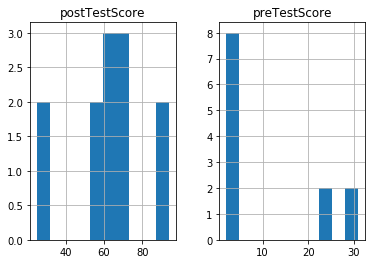

In [51]:
numeric_data=df.select_dtypes(include=['int64'])
numeric_data.head()
numeric_data.hist()

,regiment,company,name,categories
0,Nighthawks,1st,Miller,Low
1,Nighthawks,1st,Jacobson,Great
2,Nighthawks,2nd,Ali,Good
3,Nighthawks,2nd,Milner,Good
4,Dragoons,1st,Cooze,Good


<Figure size 1080x576 with 0 Axes>

regiment      None
company       None
name          None
categories    None
dtype: object

regiment      None
company       None
name          None
categories    None
dtype: object

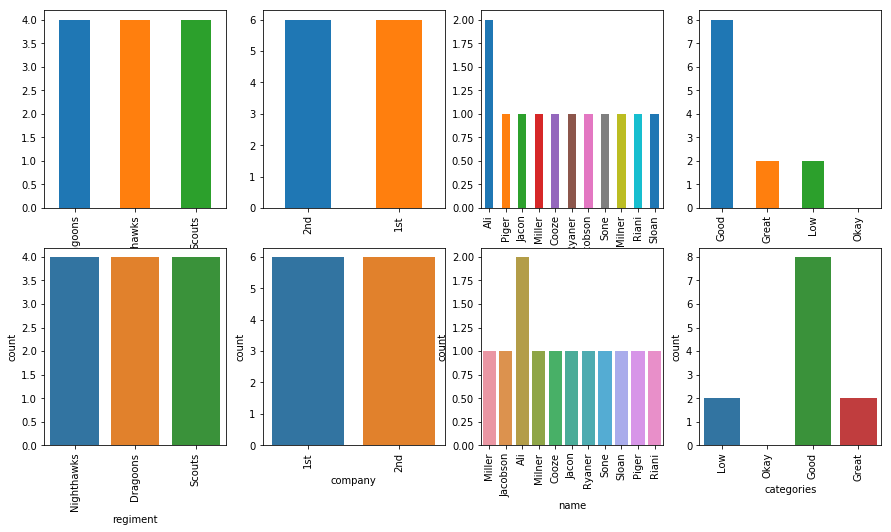

In [52]:
obj_data=df.select_dtypes(exclude=['int64'])
obj_data.head()

plt.figure(figsize=(15,8))
col_index=0

def graph(series):
    global col_index
    col_index=col_index+1
    plt.subplot(2,4,col_index)
    series.value_counts().plot.bar()
obj_data.apply(graph)


# #late binding behaviour so assign col_index to 5 everytime
# def graph(series):
#     graph.col_index=col_index+1
#     print(graph.col_index)
#     plt.subplot(2,2,graph.col_index)
#     series.value_counts().plot.bar()
# obj_data.apply(graph)

# col_index=0

def test(series,rot):
    global col_index
    col_index=col_index+1
    plt.subplot(2,4,col_index)
    sns.countplot(series)
    plt.xticks(rotation=rot)
obj_data.apply(test,rot=90)
